In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install PyMuPDF
!pip install python-Levenshtein
!pip install editdistance

In [ ]:
!pip install scikit-image

In [ ]:
!pip install python-docx

In [ ]:
# Restart the notebook
!pip install transformers[torch]
!pip install accelerate -U

In [ ]:
# Restart the notebook
!pip install evaluate
!pip install jiwer

# Installing Transformer Model


In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from heapq import heappop, heappush
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
import shutil
import os


file_path1 = '/content/drive/MyDrive/A/Padilla - 1 Nobleza virtuosa_Extract.pdf'
doc_path1 = '/content/drive/MyDrive/A/Padilla - 1 Nobleza virtuosa_Transcription (1).docx'
file_path2 = '/content/drive/MyDrive/A/Padilla - 2 Noble perfecto_Extract.pdf'
doc_path2 = '/content/drive/MyDrive/A/Padilla - 2 Noble perfecto_Transcription.docx'

shutil.copy(file_path1, './Padilla - 1 Nobleza virtuosa_Extract.pdf')
shutil.copy(file_path2, './Padilla - 2 Noble perfecto_Extract.pdf')
shutil.copy(doc_path1, './Padilla - 1 Nobleza virtuosa_Transcription (1).docx')
shutil.copy(doc_path2, './Padilla - 2 Noble perfecto_Transcription.docx')

# extended dataset A

doc_path1 = '/content/drive/MyDrive/A/Dataset A/PORCONES.228.35 – 1636 transcription.docx'
doc_path2 = '/content/drive/MyDrive/A/Dataset A/PORCONES.82.4 – 1644 transcription.docx'
doc_path3 = '/content/drive/MyDrive/A/Dataset A/PORCONES.954.2.45 transcription.docx'

if not os.path.exists('/content/transcripts'):
    os.makedirs('/content/transcripts')

shutil.copy(doc_path1, './transcripts/PORCONES.228.35 – 1636 transcription.docx')
shutil.copy(doc_path2, './transcripts/PORCONES.82.4 – 1644 transcription.docx')
shutil.copy(doc_path3, './transcripts/PORCONES.954.2.45 transcription.docx')


# extended dataset B
dp1 = '/content/drive/MyDrive/A/Dataset B - different typeface/Buendia transcription.docx'
dp2 = '/content/drive/MyDrive/A/Dataset B - different typeface/Constituciones sinodales transcription.docx'
dp3 = '/content/drive/MyDrive/A/Dataset B - different typeface/Covarrubias transcription.docx'
dp4 = '/content/drive/MyDrive/A/Dataset B - different typeface/Ezcaray transcription.docx'
dp5 = '/content/drive/MyDrive/A/Dataset B - different typeface/Guardiola transcription.docx'
dp6 = '/content/drive/MyDrive/A/Dataset B - different typeface/Mendo transcription.docx'
dp7 = '/content/drive/MyDrive/A/Dataset B - different typeface/Milán transcription.docx'
dp8 = '/content/drive/MyDrive/A/Dataset B - different typeface/Paredes transcription.docx'
dp9 = '/content/drive/MyDrive/A/Dataset B - different typeface/R.12175.3 transcription.docx'
dp10 = '/content/drive/MyDrive/A/Dataset B - different typeface/Recopilacion transcription.docx'

shutil.copy(dp1, './transcripts/Buendia transcription.docx')
shutil.copy(dp2, './transcripts/Constituciones sinodales transcription.docx')
shutil.copy(dp3, './transcripts/Covarrubias transcription.docx')
shutil.copy(dp4, './transcripts/Ezcaray transcription.docx')
shutil.copy(dp5, './transcripts/Guardiola transcription.docx')
shutil.copy(dp6, './transcripts/Mendo transcription.docx')
shutil.copy(dp7, './transcripts/Milán transcription.docx')
shutil.copy(dp8, './transcripts/Paredes transcription.docx')
shutil.copy(dp9, './transcripts/R.12175.3 transcription.docx')
shutil.copy(dp10, './transcripts/Recopilacion transcription.docx')


'./transcripts/Recopilacion transcription.docx'

# Converting PDF To Png

In [ ]:
import fitz
from PIL import Image
import os

def convert_pdf_to_images(pdf_path, output_folder,book):
    doc = fitz.open(pdf_path)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    image_paths = []
    for page_num in range(5):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        image_path = os.path.join(output_folder, f"{book}_page_{page_num + 1}.png")
        pix.save(image_path)
        image_paths.append(image_path)

    doc.close()
    return image_paths


In [ ]:
pdf_path1 = "/content/Padilla - 1 Nobleza virtuosa_Extract.pdf"
image_folder1 = "/content/image_folder1"
book1 - 'Padilla - 1 Nobleza virtuosa_Extract'
pdf_path2 = "/content/Padilla - 2 Noble perfecto_Extract.pdf"
image_folder2 = "/content/image_folder2"
book2 = 'Padilla - 2 Noble perfecto_Extract'
image_path1 = convert_pdf_to_images(pdf_path1, image_folder1,book1)
image_path2 = convert_pdf_to_images(pdf_path2, image_folder2,book2)

image_path = []
image_path.extend(image_path1)
image_path.extend(image_path2)
print(image_path)

In [ ]:
image_path = []

# Dataset A
dataset_a_paths = [
    image_path3,
    image_path4,
    image_path5,
]

for paths in dataset_a_paths:
    image_path.extend(paths)

# Dataset B
dataset_b_paths = [
    image_path6,
    image_path7,
    image_path8,
    image_path9,
    image_path10,
    image_path11,
    image_path12,
    image_path13,
    image_path14,
    image_path15,
]

for paths in dataset_b_paths:
    image_path.extend(paths)

print(image_path)


# Extract the text from doc and assign it to its corresponding image(page)

In [ ]:
import docx

# Step2
transcript = {}
def read_transcriptions(image_paths, file_path):
    # Load the DOCX file
    doc = docx.Document(file_path)

    # Initialize the dictionary to store text from each page

    # Extract text from each paragraph and assign it to the corresponding image path in the dictionary
    text = ''
    image_index = -1
    num_images = len(image_paths)

    for para in doc.paragraphs:
        stripped_text = para.text.strip()
        if "PDF" in stripped_text or "END OF EXTRACT" in stripped_text:
            if image_index >= 0:
                transcript[image_paths[image_index]] = text.strip()
            image_index += 1
            text = ''
        elif stripped_text != '':
            text += stripped_text + "\n"

    # Add the last page text if exists
    if text.strip() and image_index < num_images:
        transcript[image_paths[image_index]] = text.strip()

    return transcript


In [ ]:
transcription_path = "/content/Padilla - 1 Nobleza virtuosa_Transcription (1).docx"
transcriptions = read_transcriptions(image_path1, transcription_path)  # Read transcriptions
transcription_path = "/content/Padilla - 2 Noble perfecto_Transcription.docx"
transcriptions = read_transcriptions(image_path2, transcription_path)

# Dataset A
transcription_path = "/content/transcripts/PORCONES.82.4 – 1644 transcription.docx"
transcriptions = read_transcriptions(image_path3, transcription_path)
transcription_path = "/content/transcripts/PORCONES.954.2.45 transcription.docx"
transcriptions = read_transcriptions(image_path4, transcription_path)
transcription_path = "/content/transcripts/PORCONES.228.35 – 1636 transcription.docx"
transcriptions = read_transcriptions(image_path5, transcription_path)

# Dataset B
transcription_path = "/content/transcripts/Buendia transcription.docx"
transcriptions = read_transcriptions(image_path6, transcription_path)
transcription_path = "/content/transcripts/Constituciones sinodales transcription.docx"
transcriptions = read_transcriptions(image_path7, transcription_path)
transcription_path = "/content/transcripts/Covarrubias transcription.docx"
transcriptions = read_transcriptions(image_path8, transcription_path)
transcription_path = "/content/transcripts/Ezcaray transcription.docx"
transcriptions = read_transcriptions(image_path9, transcription_path)
transcription_path = "/content/transcripts/Guardiola transcription.docx"
transcriptions = read_transcriptions(image_path10, transcription_path)
transcription_path = "/content/transcripts/Mendo transcription.docx"
transcriptions = read_transcriptions(image_path11, transcription_path)
transcription_path = "/content/transcripts/Milán transcription.docx"
transcriptions = read_transcriptions(image_path12, transcription_path)
transcription_path = "/content/transcripts/Paredes transcription.docx"
transcriptions = read_transcriptions(image_path13, transcription_path)
transcription_path = "/content/transcripts/R.12175.3 transcription.docx"
transcriptions = read_transcriptions(image_path14, transcription_path)
transcription_path = "/content/transcripts/Recopilacion transcription.docx"
transcriptions = read_transcriptions(image_path15, transcription_path)


print(transcript.keys())

# Aligning Line segemented images with its corresponding text

In [ ]:
# Without augmentations

import os
import re
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray

def get_segmented_image_paths(input_path, segmented_image_dir):
    # Get the base name from the input path
    base_name = os.path.basename(input_path)

    # List all files in the directory
    files = os.listdir(segmented_image_dir)

    # Filter the files to get only those that start with the base name and end with "_line_*.png"
    segmented_files = [os.path.join(segmented_image_dir, f) for f in files if f.startswith(base_name) and "_line_" in f and f.endswith(".png")]

    return segmented_files

def extract_line_number(file_path):
    # Extract the line number(s) from the file name using regex
    match = re.search(r'_line_(\d+(_\d+)?).png$', file_path)
    if match:
        return list(map(int, match.group(1).split('_')))
    return [-1]

def sort_segmented_image_paths(image_paths):
    # Sort the list of paths based on the extracted line number
    sorted_paths = sorted(image_paths, key=extract_line_number)
    return sorted_paths

def align_segments_with_transcriptions(image_path, line_segmentation_path, transcription):
    segmented_image_paths = get_segmented_image_paths(image_path, line_segmentation_path)
    segmented_image_paths = sort_segmented_image_paths(segmented_image_paths)
    line_text = transcription.split('\n')

    count = 0
    data = []

    for path in segmented_image_paths:
        transcript = ""

        line_img = imread(path)[:,:,:3]

        if line_img.ndim > 2:
            line_img = rgb2gray(line_img)
        try:
            transcript = line_text[count]
            count += 1
            data.append((line_img, transcript))
        except Exception as e:
            print(f"Error processing {image_path} - {path}: {e}")
            print(len(segmented_image_paths),len(line_text))
            print('\n')
            continue
    return data

# segmented_image_folder = "/content/drive/MyDrive/A/Line_Segmented_images"
segmented_image_folder = "/content/drive/MyDrive/A/New_Line_Segmented_images"
aligned_data = {}


for img_path in image_path:
    if img_path == '/content/image_folder8/Covarrubias - Tesoro lengua_page_8.png' or img_path == '/content/image_folder8/Covarrubias - Tesoro lengua_page_9.png':
        continue
    aligned_data[img_path] = align_segments_with_transcriptions(img_path, segmented_image_folder, transcript[img_path])


In [ ]:
#with augmentations
import os
import re
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import albumentations as A

def get_segmented_image_paths(input_path, segmented_image_dir):
    base_name = os.path.basename(input_path)
    files = os.listdir(segmented_image_dir)
    segmented_files = [os.path.join(segmented_image_dir, f) for f in files if f.startswith(base_name) and "_line_" in f and f.endswith(".png")]
    return segmented_files

def extract_line_number(file_path):
    match = re.search(r'_line_(\d+(_\d+)?).png$', file_path)
    if match:
        return list(map(int, match.group(1).split('_')))
    return [-1]

def sort_segmented_image_paths(image_paths):
    sorted_paths = sorted(image_paths, key=extract_line_number)
    return sorted_paths

def apply_augmentations(image):
    augmentations = [
        A.Rotate(limit=3, p=1.0),
        A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
        A.ElasticTransform(alpha=0.3, sigma=100.0, p=1.0),
        A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
        A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
        A.Affine(scale=(0.95, 1.05), translate_percent=(0.02, 0.02), shear=(-2, 2), p=1.0),
        A.Perspective(scale=(0.01, 0.03), p=1.0),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
        A.GaussianBlur(blur_limit=(3, 7), p=1.0),
        A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
        A.MedianBlur(blur_limit=3, p=1.0),
    ]

    # Ensure the image is in np.uint8 format to avoid type mismatch
    image = image.astype(np.uint8)

    augmented_images = []
    for transform in augmentations:
        augmented_images.append(transform(image=image)['image'])
    return augmented_images

def align_segments_with_transcriptions(image_path, line_segmentation_path, transcription):

    segmented_image_paths = get_segmented_image_paths(image_path, line_segmentation_path)
    segmented_image_paths = sort_segmented_image_paths(segmented_image_paths)
    line_text = transcription.split('\n')

    count = 0
    data = []

    for path in segmented_image_paths:
        transcript = ""

        line_img = imread(path)[:,:,:3]

        if line_img.ndim > 2:
            line_img = rgb2gray(line_img)

        try:
            height = line_img.shape[0]
            transcript = line_text[count]
            count += 1

            # Apply augmentations and store results
            augmented_images = apply_augmentations(line_img)
            for aug_img in augmented_images:
                data.append((aug_img, transcript))

            # Store the original image and transcript
            data.append((line_img, transcript))
        except Exception as e:
            print(f"Error processing {image_path} - {path}: {e}")
            continue
    return data

# Example usage
segmented_image_folder = "/content/drive/MyDrive/A/New_Line_Segmented_images"
aligned_data = {}

for img_path in image_path:
    aligned_data[img_path] = align_segments_with_transcriptions(img_path, segmented_image_folder, transcript[img_path])

# Training 10




## Focal Loss, Temperature Scaling, and Sequence Likelihood Calibration techniques were implemented, and the model is trained on an extended dataset.

In [ ]:
# Sequence Likelihood Calibration
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, EarlyStoppingCallback, TrainerCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from evaluate import load
import torch.nn.functional as F
import random
from transformers import get_cosine_schedule_with_warmup
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '0'

# Load the CER and WER metrics
cer_metric = load("cer")
wer_metric = load("wer")

# model_path = "qantev/trocr-large-spanish"
# processor_path = "qantev/trocr-large-spanish"

model_path = "./finetuned_transformer_model_calibration"
processor_path = "./finetuned_transformer_model_calibration"

processor = TrOCRProcessor.from_pretrained(processor_path, do_rescale=False)
model = VisionEncoderDecoderModel.from_pretrained(model_path)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(-1)
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = []
    for label in labels:
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer_score, "wer": wer_score}

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(10.0, 30.0), p=1.0),
                    A.ElasticTransform(alpha=0.3, sigma=50.0, p=1.0),
                    A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.02, 0.02), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.MedianBlur(blur_limit=1, p=1.0)
                ], p=0.8),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)
            image = np.repeat(image, 3, axis=-1)

        image = (image * 255).astype(np.uint8)

        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        image = Image.fromarray(image)
        image = image.resize(self.target_size, Image.BILINEAR)
        image = np.array(image) / 255.0
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")
        encoding['labels'] = encoding['labels'][:, :self.max_length]
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

# Temperature Scaling
class TemperatureScalingModel(torch.nn.Module):
    def __init__(self, model, temperature=0.9995831251144409):
        super(TemperatureScalingModel, self).__init__()
        self.model = model
        self.temperature = torch.nn.Parameter(torch.ones(1) * temperature)
        self.config = model.config

    def forward(self, pixel_values, labels=None):
        if labels is not None:
            outputs = self.model(pixel_values=pixel_values, labels=labels)
            outputs.logits = outputs.logits.float() / self.temperature
            return outputs
        else:
            logits = self.model(pixel_values=pixel_values).logits
            return logits.float() / self.temperature

    def generate(self, pixel_values, **kwargs):
        return self.model.generate(pixel_values, **kwargs)

    def get_output_embeddings(self):
        return self.model.get_output_embeddings()

    def save_pretrained(self, save_directory):
        if not os.path.exists(save_directory):
            os.makedirs(save_directory)

        # Save the base model
        self.model.save_pretrained(save_directory)

        # Save the temperature parameter
        temperature_path = os.path.join(save_directory, "temperature.pt")
        torch.save(self.temperature, temperature_path)

    @classmethod
    def from_pretrained(cls, load_directory):
        base_model = VisionEncoderDecoderModel.from_pretrained(load_directory)
        temperature_path = os.path.join(load_directory, "temperature.pt")
        temperature = torch.load(temperature_path)

        model = cls(base_model, temperature.item())
        return model

class CosineAnnealingWarmRestartsSchedulerCallback(TrainerCallback):
    def __init__(self, optimizer, T_0, T_mult=1, eta_min=0):
        self.scheduler = CosineAnnealingWarmRestarts(optimizer, T_0, T_mult, eta_min)

    def on_step_end(self, args, state, control, **kwargs):
        self.scheduler.step()


class SLiCTrainer(Trainer):
    def __init__(self, *args, label_smoothing=0.1, gamma=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.label_smoothing = label_smoothing
        self.gamma = gamma

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        pixel_values = inputs.get("pixel_values")

        # Initializing lambda
        lambda_reg = 0.01

        outputs = model(pixel_values=pixel_values, labels=labels)
        logits = outputs.logits if hasattr(outputs, 'logits') else outputs
        logits = logits.float()

        # Ensure labels are within the valid range
        vocab_size = logits.size(-1)
        labels = torch.clamp(labels, min=0, max=vocab_size - 1)

        temperature = model.temperature.item() if hasattr(model, 'temperature') else 1.0

        # Compute similarity scores
        similarity_scores = self.calculate_similarity(logits, labels)

        # Apply SLIC Loss
        slic_loss = self.compute_calibration_loss(logits, labels, similarity_scores)

        # Apply KL Divergence Loss
        kl_loss = self.compute_kl_divergence(logits, labels)

        # Apply Focal Loss
        focal_loss = self.compute_focal_loss(logits, labels)

        # Total Loss
        total_loss = slic_loss + lambda_reg * (kl_loss + focal_loss)

        # clearing unnecessary tensors
        del similarity_scores, slic_loss, kl_loss, focal_loss
        torch.cuda.empty_cache()

        return (total_loss, outputs) if return_outputs else total_loss

    def compute_calibration_loss(self, logits, labels, similarity_scores):
        batch_size, seq_len, vocab_size = logits.size()
        device = logits.device

        # Compute log probabilities
        log_probs = F.log_softmax(logits, dim=-1)

        # Generate positive and negative samples
        pos_samples = labels.unsqueeze(-1)
        neg_samples = torch.randint(0, vocab_size, (batch_size, seq_len, 1), device=device)

        # Compute losses
        l_rank = self.compute_rank_loss(log_probs, pos_samples, neg_samples)
        l_margin = self.compute_margin_loss(log_probs, similarity_scores, pos_samples, neg_samples)

        # Combine losses (you may want to add weights to different loss components)
        calibration_loss = l_rank + l_margin

        del log_probs, pos_samples, neg_samples, l_rank, l_margin
        torch.cuda.empty_cache()

        return calibration_loss

    def compute_rank_loss(self, log_probs, pos_samples, neg_samples):
        beta = 0.1
        l_rank = torch.max(torch.zeros_like(log_probs[:, :, 0]),
                           beta - log_probs.gather(-1, pos_samples).squeeze(-1) +
                           log_probs.gather(-1, neg_samples).squeeze(-1)).mean()
        # print("Rank Loss : ",l_rank)
        return l_rank

    def compute_margin_loss(self, log_probs, similarity_scores, pos_samples, neg_samples):
        beta = 0.1
        l_margin = torch.max(torch.zeros_like(log_probs[:, :, 0]),
                             beta * (similarity_scores.gather(-1, pos_samples).squeeze(-1) -
                                     similarity_scores.gather(-1, neg_samples).squeeze(-1)) -
                             log_probs.gather(-1, pos_samples).squeeze(-1) +
                             log_probs.gather(-1, neg_samples).squeeze(-1)).mean()

        # print("Margin Loss : ",l_margin)
        return l_margin


    def compute_kl_divergence(self, logits, labels):
        log_probs = F.log_softmax(logits, dim=-1)
        target_probs = F.one_hot(labels, num_classes=logits.size(-1)).float()
        kl_div_loss = F.kl_div(log_probs, target_probs, reduction='batchmean')

        # print("KL Divergence Loss : ",kl_div_loss)
        return kl_div_loss

    def compute_focal_loss(self, logits, labels, gamma=2.0):
        ce_loss = F.cross_entropy(logits.view(-1, logits.size(-1)), labels.view(-1), reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** gamma * ce_loss).mean()
        # print("Focal Loss : ",focal_loss)
        return focal_loss

    def calculate_similarity(self, logits, labels):
        batch_size, seq_len, vocab_size = logits.size()
        device = logits.device

        # Get token embeddings
        token_embeddings = self.model.get_output_embeddings().weight  # Shape: [vocab_size, embedding_dim]

        # Compute logits_softmax once
        logits_softmax = F.softmax(logits, dim=-1)  # Shape: [batch_size, seq_len, vocab_size]

        # Compute Fu(e, e)
        # Instead of computing the full matrix, we'll compute it on-the-fly

        # Compute Ru(e, e)
        # We only need the first column to be 1, rest are 0
        ru_ee_first_col = torch.zeros(vocab_size, 1, device=device)
        ru_ee_first_col[0] = 1.0  # Assuming 0 is the padding token index

        # Compute similarity scores
        # We'll do this in two parts to save memory

        # Part 1: Fu(e, e) contribution
        similarity_scores = torch.matmul(logits_softmax, token_embeddings)  # [batch_size, seq_len, embedding_dim]
        similarity_scores = torch.matmul(similarity_scores, token_embeddings.t())  # [batch_size, seq_len, vocab_size]

        # Part 2: Ru(e, e) contribution
        ru_contribution = torch.matmul(logits_softmax, ru_ee_first_col)  # [batch_size, seq_len, 1]

        # Combine both parts
        similarity_scores = (similarity_scores + ru_contribution) / 2

        return similarity_scores


    def beam_search_decode(self, model, pixel_values, beam_size=10, max_length=128):
        # Implement beam search decoding
        batch_size = pixel_values.size(0)
        device = pixel_values.device

        encoder_outputs = model.encoder(pixel_values=pixel_values)
        input_ids = torch.full((batch_size * beam_size, 1), model.config.decoder_start_token_id, dtype=torch.long, device=device)
        beam_scores = torch.zeros((batch_size, beam_size), dtype=torch.float, device=device)
        beam_scores[:, 1:] = -1e9
        beam_scores = beam_scores.view(-1)

        for step in range(max_length):
            outputs = model.decoder(input_ids=input_ids, encoder_hidden_states=encoder_outputs.last_hidden_state.repeat_interleave(beam_size, dim=0))
            next_token_logits = outputs.logits[:, -1, :]
            next_token_scores = F.log_softmax(next_token_logits, dim=-1)
            next_token_scores = next_token_scores + beam_scores[:, None].expand_as(next_token_scores)
            vocab_size = next_token_scores.size(-1)

            next_token_scores = next_token_scores.view(batch_size, beam_size * vocab_size)
            next_tokens = torch.argmax(next_token_scores, dim=-1)
            next_tokens = next_tokens % vocab_size
            next_beam_scores = torch.gather(next_token_scores, -1, next_tokens.unsqueeze(-1)).squeeze(-1)

            input_ids = torch.cat([input_ids, next_tokens.unsqueeze(-1)], dim=-1)
            beam_scores = next_beam_scores.view(-1)

            if (next_tokens == model.config.eos_token_id).any():
                break

        return input_ids.view(batch_size, beam_size, -1)[:, 0, :]

    def create_scheduler(self, num_training_steps: int, optimizer: torch.optim.Optimizer = None):
        """
        Create a scheduler using CosineAnnealingWarmRestarts
        """
        if optimizer is None:
            optimizer = self.optimizer
        return CosineAnnealingWarmRestarts(optimizer, T_0=num_training_steps // 10, T_mult=2, eta_min=1e-6)

def train_transformer_with_slic(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1, initial_seed=42, label_smoothing=0.1, gamma=2.0):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained(processor_path, do_rescale=False)
    base_model = VisionEncoderDecoderModel.from_pretrained(model_path)
    model = TemperatureScalingModel(base_model)

    model.config.pad_token_id = processor.tokenizer.pad_token_id
    model.config.decoder_start_token_id = processor.tokenizer.bos_token_id

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    model = model.to(device)
    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=10,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size * 2,
        logging_dir="./logs",
        logging_steps=100,
        save_steps=300,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=300,
        learning_rate=3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=8,
        fp16=True,
        warmup_ratio=0.1,
        report_to="all",
        dataloader_num_workers=4,
        dataloader_pin_memory=True,
        lr_scheduler_type="cosine",
        warmup_steps=1000,
    )

    # Optimizer
    optimizer = AdamW(model.parameters(),
                      lr=training_args.learning_rate,
                      weight_decay=1e-2,
                      betas=(0.9, 0.999),
                      eps=1e-8)

    # Learning rate scheduler
    num_training_steps = len(train_dataset) * training_args.num_train_epochs // (training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps)
    scheduler = get_cosine_schedule_with_warmup(optimizer,
                                                num_warmup_steps=1000,
                                                num_training_steps=num_training_steps)


    trainer = SLiCTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        compute_metrics=compute_metrics,
        label_smoothing=label_smoothing,
        gamma=gamma,
    )

    trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=3))
    # trainer.add_callback(CosineAnnealingWarmRestartsSchedulerCallback(optimizer, T_0=num_training_steps // 10, T_mult=2, eta_min=1e-6))

    trainer.train()

    # Save the model and processor
    save_dir = "finetuned_transformer_model_calibration_v2"
    model.save_pretrained(save_dir)
    processor.save_pretrained(save_dir)

    return trainer, model.temperature.item()

In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

trainer, learned_temperature = train_transformer_with_slic(line_images, texts, target_size=(256,64), batch_size=2, max_length=128, val_split=0.1)

print(learned_temperature)
torch.save({"temperature": learned_temperature}, "learned_temperature.pth")
!cp -r /content/finetuned_transformer_model_calibration_v2 /content/drive/MyDrive/finetuned_transformer_model_calibration_v2
!cp learned_temperature.pth /content/drive/MyDrive/learned_temperature.pth


In [ ]:
# Beam search with Focal loss
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from evaluate import load
import torch.nn.functional as F
import random
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '0'

# Load metrics
cer_metric = load("cer")
wer_metric = load("wer")

processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(-1)
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = []
    for label in labels:
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer_score, "wer": wer_score}

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=3, p=1.0),
                    A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
                    A.ElasticTransform(alpha=0.3, sigma=50.0, p=1.0),
                    A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.02, 0.02), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 7), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=0.7),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)
            image = np.repeat(image, 3, axis=-1)

        image = (image * 255).astype(np.uint8)

        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        image = Image.fromarray(image)
        image = image.resize(self.target_size, Image.BILINEAR)
        image = np.array(image) / 255.0
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")
        encoding['labels'] = encoding['labels'][:, :self.max_length]
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def focal_beam_search_loss(logits, labels, beam_size=10, length_penalty=2.0, alpha=0.6, label_smoothing=0.1, gamma=2.0):
    batch_size, seq_len, vocab_size = logits.shape
    beam_scores, beam_indices = logits.topk(beam_size, dim=-1)
    log_probs = F.log_softmax(logits, dim=-1)
    beam_log_probs = log_probs.gather(-1, beam_indices)

    mask = (labels != -100).float()
    sequence_lengths = mask.sum(dim=1)

    labels = labels.long()
    valid_labels = labels.clamp(min=0, max=vocab_size - 1)

    smooth_labels = torch.zeros_like(logits).scatter_(-1, valid_labels.unsqueeze(-1), 1)
    smooth_labels = smooth_labels * (1 - label_smoothing) + label_smoothing / vocab_size

    # Focal Loss integration
    probs = F.softmax(logits, dim=-1)
    focal_weight = (1 - probs.gather(-1, valid_labels.unsqueeze(-1)).squeeze(-1)) ** gamma
    beam_loss = -(smooth_labels * log_probs).sum(dim=-1) * focal_weight
    beam_loss = beam_loss.masked_fill(mask == 0, 0).sum(dim=1)

    normalized_beam_loss = beam_loss / (sequence_lengths ** length_penalty + 1e-6)  # Add small epsilon
    log_likelihood = -normalized_beam_loss
    normalized_log_likelihood = log_likelihood / (sequence_lengths.pow(alpha) + 1e-6)  # Add small epsilon

    losses = [-normalized_log_likelihood]
    stacked_losses = torch.stack(losses, dim=1)
    min_loss = stacked_losses.min(dim=1)[0]

    return min_loss.mean()
class FocalBeamSearchTrainer(Trainer):
    def __init__(self, *args, label_smoothing=0.1, gamma=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.label_smoothing = label_smoothing
        self.gamma = gamma

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        pixel_values = inputs.pop("pixel_values")

        outputs = model(pixel_values=pixel_values, labels=labels)
        logits = outputs.logits

        loss = focal_beam_search_loss(logits, labels, label_smoothing=self.label_smoothing, gamma=self.gamma)

        return (loss, outputs) if return_outputs else loss

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1, initial_seed=42, label_smoothing=0.1, gamma=2.0):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")
    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    model.config.pad_token_id = processor.tokenizer.pad_token_id
    model.config.decoder_start_token_id = processor.tokenizer.bos_token_id

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=10,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=100,
        save_steps=100,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=100,
        learning_rate=2e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=32,
        fp16=True,
        warmup_ratio=0.1,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = FocalBeamSearchTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
        compute_metrics=compute_metrics,
        label_smoothing=label_smoothing,
        gamma=gamma
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model_focal")
    processor.save_pretrained("finetuned_transformer_model_focal")

    return trainer

In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

trainer= train_transformer_model(line_images, texts, target_size=(384, 96), batch_size=2, max_length=256,val_split=0.1)
! cp -r /content/finetuned_transformer_model_focal /content/drive/MyDrive/finetuned_transformer_model_focal


In [ ]:
# Beam search + focal loss + temperature scaling
import os
import albumentations as A
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback, TrainerCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from evaluate import load

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '0'

# Load metrics
cer_metric = load("cer")
wer_metric = load("wer")
processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

class TemperatureScaledTrOCR(torch.nn.Module):
    def __init__(self, model, temperature=1.0):
        super(TemperatureScaledTrOCR, self).__init__()
        self.model = model
        self.temperature = torch.nn.Parameter(torch.ones(1) * temperature)

    def forward(self, pixel_values, labels=None):
        if labels is not None:
            outputs = self.model(pixel_values=pixel_values, labels=labels)
            outputs.logits = outputs.logits.float() / self.temperature
            return outputs
        else:
            logits = self.model(pixel_values=pixel_values).logits
            return logits.float() / self.temperature

    def generate(self, pixel_values, **kwargs):
        return self.model.generate(pixel_values, **kwargs)

    def save_pretrained(self, save_directory):
        if not os.path.exists(save_directory):
            os.makedirs(save_directory)

        # Save the base model
        self.model.save_pretrained(save_directory)

        # Save the temperature parameter
        temperature_path = os.path.join(save_directory, "temperature.pt")
        torch.save(self.temperature, temperature_path)

    @classmethod
    def from_pretrained(cls, load_directory):
        base_model = VisionEncoderDecoderModel.from_pretrained(load_directory)
        temperature_path = os.path.join(load_directory, "temperature.pt")
        temperature = torch.load(temperature_path)

        model = cls(base_model, temperature.item())
        return model

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(-1)
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = []
    for label in labels:
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer_score, "wer": wer_score}

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(10.0, 30.0), p=1.0),
                    A.ElasticTransform(alpha=0.2, sigma=50.0, p=1.0),
                    A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.02, 0.02), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=0.7),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)
            image = np.repeat(image, 3, axis=-1)

        image = (image * 255).astype(np.uint8)

        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        image = Image.fromarray(image)
        image = image.resize(self.target_size, Image.BILINEAR)
        image = np.array(image) / 255.0
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")
        encoding['labels'] = encoding['labels'][:, :self.max_length]
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def focal_beam_search_loss(logits, labels, beam_size=10, length_penalty=1.1, alpha=0.6, label_smoothing=0.1, gamma=2.0, temperature=1.0):
    scaled_logits = logits / temperature
    batch_size, seq_len, vocab_size = scaled_logits.shape
    beam_scores, beam_indices = scaled_logits.topk(beam_size, dim=-1)
    log_probs = F.log_softmax(scaled_logits, dim=-1)
    beam_log_probs = log_probs.gather(-1, beam_indices)

    mask = (labels != -100).float()
    sequence_lengths = mask.sum(dim=1)

    labels = labels.long()
    valid_labels = labels.clamp(min=0, max=vocab_size - 1)

    smooth_labels = torch.zeros_like(scaled_logits).scatter_(-1, valid_labels.unsqueeze(-1), 1)
    smooth_labels = smooth_labels * (1 - label_smoothing) + label_smoothing / vocab_size

    probs = F.softmax(scaled_logits, dim=-1)
    focal_weight = (1 - probs.gather(-1, valid_labels.unsqueeze(-1)).squeeze(-1)) ** gamma
    beam_loss = -(smooth_labels * log_probs).sum(dim=-1) * focal_weight
    beam_loss = beam_loss.masked_fill(mask == 0, 0).sum(dim=1)

    normalized_beam_loss = beam_loss / (sequence_lengths ** length_penalty + 1e-6)
    log_likelihood = -normalized_beam_loss
    normalized_log_likelihood = log_likelihood / (sequence_lengths.pow(alpha) + 1e-6)

    losses = [-normalized_log_likelihood]
    stacked_losses = torch.stack(losses, dim=1)
    min_loss = stacked_losses.min(dim=1)[0]

    return min_loss.mean()

class CosineAnnealingWarmRestartsSchedulerCallback(TrainerCallback):
    def __init__(self, optimizer, T_0, T_mult=1, eta_min=0):
        self.scheduler = CosineAnnealingWarmRestarts(optimizer, T_0, T_mult, eta_min)

    def on_step_end(self, args, state, control, **kwargs):
        self.scheduler.step()

class FocalBeamSearchTrainer(Trainer):
    def __init__(self, *args, label_smoothing=0.1, gamma=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.label_smoothing = label_smoothing
        self.gamma = gamma

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        pixel_values = inputs.pop("pixel_values")

        outputs = model(pixel_values=pixel_values, labels=labels)

        # Handle the case where outputs is a tensor (logits) or an object with logits attribute
        if isinstance(outputs, torch.Tensor):
            logits = outputs
        else:
            logits = outputs.logits

        temperature = model.temperature.item() if hasattr(model, 'temperature') else 1.0

        loss = focal_beam_search_loss(logits, labels, label_smoothing=self.label_smoothing, gamma=self.gamma, temperature=temperature)

        return (loss, outputs) if return_outputs else loss

    def create_scheduler(self, num_training_steps: int, optimizer: torch.optim.Optimizer = None):
        """
        Create a scheduler using CosineAnnealingWarmRestarts
        """
        if optimizer is None:
            optimizer = self.optimizer
        return CosineAnnealingWarmRestarts(optimizer, T_0=num_training_steps // 15, T_mult=2, eta_min=1e-6)


def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1, initial_seed=42, label_smoothing=0.1, gamma=2.0):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    base_model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")
    model = TemperatureScaledTrOCR(base_model)
    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    model.model.config.pad_token_id = processor.tokenizer.pad_token_id
    model.model.config.decoder_start_token_id = processor.tokenizer.bos_token_id

    dataset = LineDataset(processor, model.model, line_images, texts, target_size, max_length, apply_augmentation=True)

    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    model = model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=15,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=60,
        save_steps=60,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=60,
        learning_rate=3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=32,
        fp16=True,
        warmup_ratio=0.1,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=5e-6)

    trainer = FocalBeamSearchTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        compute_metrics=compute_metrics,
        label_smoothing=label_smoothing,
        gamma=gamma
    )

    trainer.optimizer = optimizer
    num_training_steps = len(train_dataset) * training_args.num_train_epochs // (training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps)
    scheduler = trainer.create_scheduler(num_training_steps, optimizer)
    trainer.lr_scheduler = scheduler

    trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=5))
    trainer.add_callback(CosineAnnealingWarmRestartsSchedulerCallback(optimizer, T_0=num_training_steps // 15, T_mult=2, eta_min=1e-6))

    trainer.train()

    # Save the model and processor
    save_dir = "finetuned_transformer_model_focal_temp_scaled_v2"
    model.save_pretrained(save_dir)
    processor.save_pretrained(save_dir)

    return trainer, model.temperature.item()

In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

trainer, learned_temperature = train_transformer_model(line_images, texts, target_size=(384, 96), batch_size=2, max_length=256, val_split=0.1)

print(learned_temperature)
torch.save({"temperature": learned_temperature}, "learned_temperature.pth")
!cp -r /content/finetuned_transformer_model_focal_temp_scaled /content/drive/MyDrive/finetuned_transformer_model_focal_temp_scaled
!cp learned_temperature.pth /content/drive/MyDrive/learned_temperature.pth


In [ ]:
#test

In [ ]:
!cp -r  /content/drive/MyDrive/finetuned_transformer_model_focal_temp_scaled /content/finetuned_transformer_model_focal_temp_scaled

In [ ]:
import torch
from torch.utils.data import DataLoader
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import os
import re
import matplotlib.pyplot as plt
import cv2

def get_segmented_image_paths(input_path, segmented_image_dir):
    # Get the base name from the input path
    base_name = os.path.basename(input_path)

    # List all files in the directory
    files = os.listdir(segmented_image_dir)

    # Filter the files to get only those that start with the base name and end with "_line_*.png"
    segmented_files = [os.path.join(segmented_image_dir, f) for f in files if f.startswith(base_name) and "_line_" in f and f.endswith(".png")]

    return segmented_files

def extract_line_number(file_path):
    # Extract the line number(s) from the file name using regex
    match = re.search(r'_line_(\d+(_\d+)?).png$', file_path)
    if match:
        return list(map(int, match.group(1).split('_')))
    return [-1]

def sort_segmented_image_paths(image_paths):
    # Sort the list of paths based on the extracted line number
    sorted_paths = sorted(image_paths, key=extract_line_number)
    return sorted_paths


# Function to load images from a directory
def load_images_from_directory(img_path,directory_path, target_size):
    images = []

    # Get sorted image paths
    image_paths = get_segmented_image_paths(img_path, directory_path)
    image_paths = sort_segmented_image_paths(image_paths)

    for filename in image_paths:
        image = Image.open(filename).convert("RGB")  # Ensure 3 channels
            # image = image.resize(target_size, Image.BILINEAR)
        image = np.array(image, dtype=np.uint8)  # Ensure dtype uint8
        images.append(image)
    return images, image_paths


def generate_texts_from_images(line_images, target_size=(256, 64), batch_size=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model_focal_temp_scaled"
    processor_path = "./finetuned_transformer_model_focal_temp_scaled"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    # Load the learned temperature
    learned_temp = torch.load("/content/learned_temperature.pth")["temperature"]

    dataset = LineDataset(processor, model, line_images, [""]*len(line_images), target_size, apply_augmentation=False)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()

    generated_texts = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions with temperature scaling
            generated_ids = model.generate(pixel_values, temperature=learned_temp)
            generated_texts_batch = processor.batch_decode(generated_ids, skip_special_tokens=True)
            generated_texts.extend(generated_texts_batch)

    return generated_texts



In [ ]:
# Load images from the specified directory
image_directory = '/content/Guardiola-Test'
target_size = (384, 96)
img_path = '/content/Guardiola - Tratado nobleza_page_25.png'
line_images, image_paths = load_images_from_directory(img_path, image_directory, target_size)

# Generate texts for the loaded images
generated_texts = generate_texts_from_images(line_images, target_size=target_size, batch_size=2)

gen_text = []
# Display the images with their generated texts
for img_path, img, text in zip(image_paths, line_images, generated_texts):
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Generated Text: {text}")
    plt.axis('off')
    plt.show()
    gen_text.append(text)
    print(f"Image Path: {img_path}\nGenerated Text: {text}\n{'='*50}")

for i, pred in enumerate(gen_text):
    print(f"{i+1} : {pred}")

# Training 9

## Implemented both Beam Search Loss Function with Label smoothening technique, and hyperparameter tuning

In [ ]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=128,
    no_repeat_ngram_size=3
)

generation_config.save_pretrained("generation_config_5")

In [ ]:
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datasets import load_metric
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '0'


# Load the CER and WER metrics
cer_metric = load_metric("cer")
wer_metric = load_metric("wer")
processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(-1)
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = []
    for label in labels:
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer_score, "wer": wer_score}

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=3, p=1.0),
                    A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
                    A.ElasticTransform(alpha=0.3, sigma=50.0, alpha_affine=0.3, p=1.0),
                    A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.015, 0.015), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 7), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=0.8),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)
            image = np.repeat(image, 3, axis=-1)

        image = (image * 255).astype(np.uint8)

        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        image = Image.fromarray(image)
        image = image.resize(self.target_size, Image.BILINEAR)
        image = np.array(image) / 255.0
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")
        encoding['labels'] = encoding['labels'][:, :self.max_length]
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def beam_search_loss(logits, labels, beam_size=5, length_penalty=2.0, alpha=0.6, label_smoothing=0.1):
    batch_size, seq_len, vocab_size = logits.shape
    beam_scores, beam_indices = logits.topk(beam_size, dim=-1)
    log_probs = F.log_softmax(logits, dim=-1)
    beam_log_probs = log_probs.gather(-1, beam_indices)

    mask = (labels != -100).float()
    sequence_lengths = mask.sum(dim=1)

    # Ensure labels are within valid range
    labels = labels.long()
    valid_labels = labels.clamp(min=0, max=vocab_size - 1)

    # Apply label smoothing
    smooth_labels = torch.zeros_like(logits).scatter_(-1, valid_labels.unsqueeze(-1), 1)
    smooth_labels = smooth_labels * (1 - label_smoothing) + label_smoothing / vocab_size

    beam_loss = -(smooth_labels * log_probs).sum(dim=-1)
    beam_loss = beam_loss.masked_fill(mask == 0, 0).sum(dim=1)

    normalized_beam_loss = beam_loss / (sequence_lengths ** length_penalty)
    log_likelihood = -normalized_beam_loss
    normalized_log_likelihood = log_likelihood / sequence_lengths.pow(alpha)

    losses = [-normalized_log_likelihood]
    stacked_losses = torch.stack(losses, dim=1)
    min_loss = stacked_losses.min(dim=1)[0]

    return min_loss.mean()



class BeamSearchTrainer(Trainer):
    def __init__(self, *args, label_smoothing=0.1, **kwargs):
        super().__init__(*args, **kwargs)
        self.label_smoothing = label_smoothing

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        pixel_values = inputs.pop("pixel_values")

        outputs = model(pixel_values=pixel_values, labels=labels)
        logits = outputs.logits

        loss = beam_search_loss(logits, labels, label_smoothing=self.label_smoothing)

        return (loss, outputs) if return_outputs else loss

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1, initial_seed=42, label_smoothing=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")
    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    model.config.pad_token_id = processor.tokenizer.pad_token_id
    model.config.decoder_start_token_id = processor.tokenizer.bos_token_id

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=20,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=50,
        save_steps=50,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=50,
        learning_rate=3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=32,
        fp16=False,
        warmup_ratio=0.1,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = BeamSearchTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
        compute_metrics=compute_metrics,
        label_smoothing=label_smoothing
    )

    for epoch in range(training_args.num_train_epochs):
        set_random_seed(initial_seed + epoch)
        trainer.train()

    model.save_pretrained("finetuned_transformer_model9")
    processor.save_pretrained("finetuned_transformer_model9")

    return trainer

In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

trainer= train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=128,val_split=0.1)
! cp -r /content/finetuned_transformer_model9 /content/drive/MyDrive/finetuned_transformer_model9


In [ ]:
import matplotlib.pyplot as plt

def plot_training_results(trainer):
    # Extract the training history
    history = trainer.state.log_history

    # Separate data into different lists
    train_loss = []
    eval_loss = []
    eval_cer = []
    eval_wer = []
    steps = []

    for entry in history:
        if 'loss' in entry:
            train_loss.append(entry['loss'])
            steps.append(entry['step'])
        elif 'eval_loss' in entry:
            eval_loss.append(entry['eval_loss'])
            eval_cer.append(entry['eval_cer'])
            eval_wer.append(entry['eval_wer'])

    # Create a figure with 2 rows and 2 columns
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Plot training loss
    axs[0, 0].plot(steps, train_loss)
    axs[0, 0].set_title('Training Loss')
    axs[0, 0].set_xlabel('Steps')
    axs[0, 0].set_ylabel('Loss')

    # Plot validation loss
    eval_steps = [step for step in steps if step % trainer.args.eval_steps == 0]
    axs[0, 1].plot(eval_steps, eval_loss)
    axs[0, 1].set_title('Validation Loss')
    axs[0, 1].set_xlabel('Steps')
    axs[0, 1].set_ylabel('Loss')

    # Plot CER
    axs[1, 0].plot(eval_steps, eval_cer)
    axs[1, 0].set_title('Character Error Rate (CER)')
    axs[1, 0].set_xlabel('Steps')
    axs[1, 0].set_ylabel('CER')

    # Plot WER
    axs[1, 1].plot(eval_steps, eval_wer)
    axs[1, 1].set_title('Word Error Rate (WER)')
    axs[1, 1].set_xlabel('Steps')
    axs[1, 1].set_ylabel('WER')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Optionally, save the figure
    plt.savefig('training_results.png')

# After training is complete
plot_training_results(trainer)

#Training 8

## Implemented Beam Search Loss function and made custom BeamSearch Trainer

In [ ]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=512,
    no_repeat_ngram_size=3
)

generation_config.save_pretrained("generation_config_5")

In [ ]:
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datasets import load_metric
import torch.nn.functional as F

# Load the CER and WER metrics
cer_metric = load_metric("cer")
wer_metric = load_metric("wer")
processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(-1)
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = []
    for label in labels:
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer_score, "wer": wer_score}

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(10.0, 30.0), p=1.0),
                    A.ElasticTransform(alpha=0.3, sigma=50.0, alpha_affine=0.3, p=1.0),
                    A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 7), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=0.7),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)
            image = np.repeat(image, 3, axis=-1)

        image = (image * 255).astype(np.uint8)

        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        image = Image.fromarray(image)
        image = image.resize(self.target_size, Image.BILINEAR)
        image = np.array(image) / 255.0
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")
        encoding['labels'] = encoding['labels'][:, :self.max_length]
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def beam_search_loss(logits, labels, beam_size=5, length_penalty=0.6, alpha=0.6):
    batch_size, seq_len, vocab_size = logits.shape

    beam_scores, beam_indices = logits.topk(beam_size, dim=-1)
    log_probs = F.log_softmax(logits, dim=-1)
    beam_log_probs = log_probs.gather(-1, beam_indices)

    mask = (labels != -100).float()
    sequence_lengths = mask.sum(dim=1)

    losses = []
    for k in range(beam_size):
        beam_loss = F.cross_entropy(logits.view(-1, vocab_size), labels.view(-1), reduction='none')
        beam_loss = beam_loss.view(batch_size, seq_len)

        normalized_beam_loss = beam_loss.sum(dim=1) / (sequence_lengths ** length_penalty)
        log_likelihood = -normalized_beam_loss
        normalized_log_likelihood = log_likelihood / sequence_lengths.pow(alpha)

        losses.append(-normalized_log_likelihood)

    stacked_losses = torch.stack(losses, dim=1)
    min_loss = stacked_losses.min(dim=1)[0]

    return min_loss.mean()

class BeamSearchTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        pixel_values = inputs.pop("pixel_values")

        outputs = model(pixel_values=pixel_values, labels=labels)
        logits = outputs.logits

        loss = beam_search_loss(logits, labels)

        return (loss, outputs) if return_outputs else loss

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")
    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    model.config.pad_token_id = processor.tokenizer.pad_token_id
    model.config.decoder_start_token_id = processor.tokenizer.bos_token_id

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=40,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=100,
        save_steps=100,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=100,
        learning_rate=3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=32,
        fp16=True,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = BeamSearchTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=4)],
        compute_metrics=compute_metrics
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model8")
    processor.save_pretrained("finetuned_transformer_model8")

    return trainer

In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

trainer= train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512,val_split=0.1)

In [ ]:
import matplotlib.pyplot as plt

def plot_training_results(trainer):
    # Extract the training history
    history = trainer.state.log_history

    # Separate data into different lists
    train_loss = []
    eval_loss = []
    eval_cer = []
    eval_wer = []
    steps = []

    for entry in history:
        if 'loss' in entry:
            train_loss.append(entry['loss'])
            steps.append(entry['step'])
        elif 'eval_loss' in entry:
            eval_loss.append(entry['eval_loss'])
            eval_cer.append(entry['eval_cer'])
            eval_wer.append(entry['eval_wer'])

    # Create a figure with 2 rows and 2 columns
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Plot training loss
    axs[0, 0].plot(steps, train_loss)
    axs[0, 0].set_title('Training Loss')
    axs[0, 0].set_xlabel('Steps')
    axs[0, 0].set_ylabel('Loss')

    # Plot validation loss
    eval_steps = [step for step in steps if step % trainer.args.eval_steps == 0]
    axs[0, 1].plot(eval_steps, eval_loss)
    axs[0, 1].set_title('Validation Loss')
    axs[0, 1].set_xlabel('Steps')
    axs[0, 1].set_ylabel('Loss')

    # Plot CER
    axs[1, 0].plot(eval_steps, eval_cer)
    axs[1, 0].set_title('Character Error Rate (CER)')
    axs[1, 0].set_xlabel('Steps')
    axs[1, 0].set_ylabel('CER')

    # Plot WER
    axs[1, 1].plot(eval_steps, eval_wer)
    axs[1, 1].set_title('Word Error Rate (WER)')
    axs[1, 1].set_xlabel('Steps')
    axs[1, 1].set_ylabel('WER')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Optionally, save the figure
    plt.savefig('training_results.png')

# After training is complete
plot_training_results(trainer)

# Training 7

## Training Stratergy : Initially trained the model for 30 epochs on non augmented data (using pretrained TrOCR weights), and then trained the model for more 30 epochs on augmented data (using initial 30 epoch weights)

In [ ]:
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datasets import load_metric

# Load the CER and WER metrics
cer_metric = load_metric("cer")
wer_metric = load_metric("wer")

# processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
# model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(-1)
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = []
    for label in labels:
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer_score, "wer": wer_score}

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(10.0, 30.0), p=1.0),
                    A.ElasticTransform(alpha=0.3, sigma=50.0, alpha_affine=0.3, p=1.0),
                    A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 7), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=1.0),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 dimensions
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        # Convert image to PIL for resizing
        image = Image.fromarray(image)

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array
        image = np.array(image) / 255.0

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Truncate labels if they exceed the maximum length
        encoding['labels'] = encoding['labels'][:, :self.max_length]

        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")
    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=False)

    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=30,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=50,
        save_steps=50,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=50,
        learning_rate=5e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=32,
        fp16=True,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=4)],
        compute_metrics=compute_metrics
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model7")
    processor.save_pretrained("finetuned_transformer_model7")

    return trainer


In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

trainer= train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512,val_split=0.15)

In [ ]:
# test

In [ ]:
! cp -r /content/drive/MyDrive/finetuned_transformer_model7 /content/finetuned_transformer_model7

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from jiwer import wer
import jiwer

def evaluating_model(line_images, texts, target_size=(256, 64), batch_size=2):
    # device = torch.device('cpu')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model7"
    processor_path = "./finetuned_transformer_model7"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, texts, target_size,apply_augmentation=False)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0

    cer_scores = []
    wer_scores = []
    bleu_scores = []
    text = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)

            # Calculate CER and WER for each prediction
            for i in range(len(generated_texts)):
                gt = texts[num_batches * batch_size + i]
                pred = generated_texts[i]

                # Calculate CER
                cer = jiwer.wer(gt, pred) / len(gt)
                cer_scores.append(cer)

                # Calculate WER
                wer_score = wer(gt, pred)
                wer_scores.append(wer_score)

                # Calculate BLEU score
                bleu_score = sentence_bleu([gt.split()], pred.split())
                bleu_scores.append(bleu_score)

                # Display image and predictions
                image = line_images[num_batches * batch_size + i]
                plt.figure(figsize=(8, 6))
                plt.imshow(image, cmap='gray')
                plt.title(f"Target: {gt}\nPrediction: {pred}")
                plt.axis('off')
                plt.show()
                print("="*50)
                text.append(pred)

            num_batches += 1

    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 0
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

    print(f"Average CER: {avg_cer:.4f}")
    print(f"Average WER: {avg_wer:.4f}")
    print(f"Average BLEU: {avg_bleu:.4f}")
    print("Evaluation completed.")

    for i, pred in enumerate(text):
        print(f"{i+1} : {pred}")



In [ ]:
test_line_images = '/content/test_images/P1-16'

aligned_data = {}
aligned_data['/content/image_folder1/Padilla - 1_page_16.png'] = align_segments_with_transcriptions('/content/image_folder1/Padilla - 1_page_16.png', test_line_images, transcript['/content/image_folder1/Padilla - 1_page_16.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

In [ ]:
# v2

In [ ]:
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datasets import load_metric

# Load the CER and WER metrics
cer_metric = load_metric("cer")
wer_metric = load_metric("wer")
# model_path = "./finetuned_transformer_model7"
# processor_path = "./finetuned_transformer_model7"

# processor = TrOCRProcessor.from_pretrained(processor_path, do_rescale=False)
# model = VisionEncoderDecoderModel.from_pretrained(model_path)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    if isinstance(logits, tuple):
        logits = logits[0]
    predictions = logits.argmax(-1)
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = []
    for label in labels:
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"cer": cer_score, "wer": wer_score}

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(10.0, 30.0), p=1.0),
                    A.ElasticTransform(alpha=0.3, sigma=50.0, alpha_affine=0.3, p=1.0),
                    A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 7), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=1.0),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 dimensions
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        # Convert image to PIL for resizing
        image = Image.fromarray(image)

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array
        image = np.array(image) / 255.0

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Truncate labels if they exceed the maximum length
        encoding['labels'] = encoding['labels'][:, :self.max_length]

        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model7"
    processor_path = "./finetuned_transformer_model7"

    processor = TrOCRProcessor.from_pretrained(processor_path, do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)
    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=30,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=100,
        save_steps=100,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=100,
        learning_rate=3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=32,
        fp16=True,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=4)],
        compute_metrics=compute_metrics
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model7v2")
    processor.save_pretrained("finetuned_transformer_model7v2")

    return trainer


In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

trainer= train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512,val_split=0.1)

In [ ]:
# test

In [ ]:
! cp -r /content/drive/MyDrive/finetuned_transformer_model7v2 /content/finetuned_transformer_model7v2

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from jiwer import wer
import jiwer

def evaluating_model(line_images, texts, target_size=(256, 64), batch_size=2):
    # device = torch.device('cpu')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model7v2"
    processor_path = "./finetuned_transformer_model7v2"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, texts, target_size,apply_augmentation=False)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0

    cer_scores = []
    wer_scores = []
    bleu_scores = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)

            # Calculate CER and WER for each prediction
            for i in range(len(generated_texts)):
                gt = texts[num_batches * batch_size + i]
                pred = generated_texts[i]

                # Calculate CER
                cer = jiwer.wer(gt, pred) / len(gt)
                cer_scores.append(cer)

                # Calculate WER
                wer_score = wer(gt, pred)
                wer_scores.append(wer_score)

                # Calculate BLEU score
                bleu_score = sentence_bleu([gt.split()], pred.split())
                bleu_scores.append(bleu_score)

                # Display image and predictions
                image = line_images[num_batches * batch_size + i]
                plt.figure(figsize=(8, 6))
                plt.imshow(image, cmap='gray')
                plt.title(f"Target: {gt}\nPrediction: {pred}")
                plt.axis('off')
                plt.show()
                print("="*50)

            num_batches += 1

    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 0
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

    print(f"Average CER: {avg_cer:.4f}")
    print(f"Average WER: {avg_wer:.4f}")
    print(f"Average BLEU: {avg_bleu:.4f}")
    print("Evaluation completed.")


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1376: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


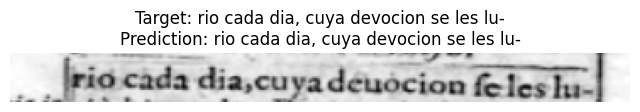

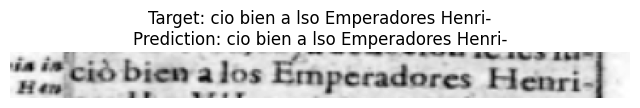

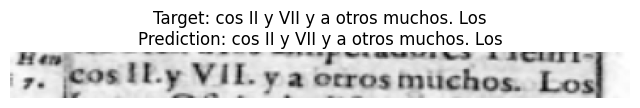

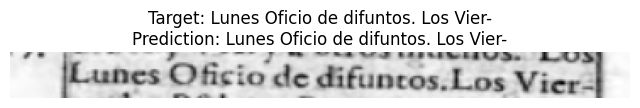

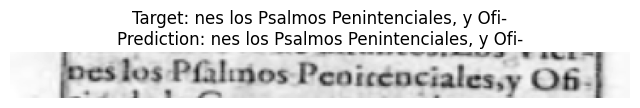

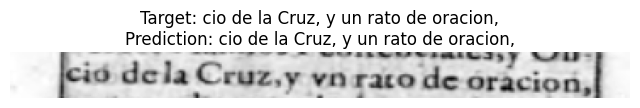

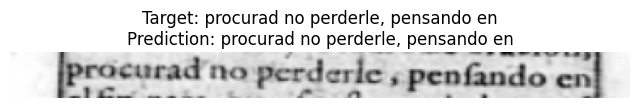

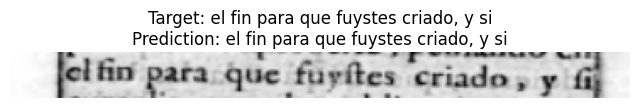

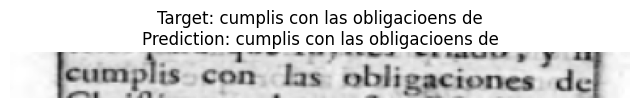

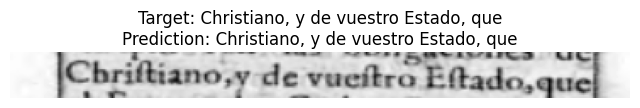

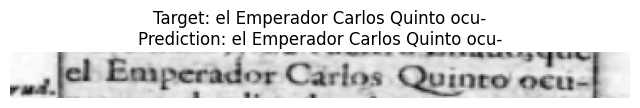

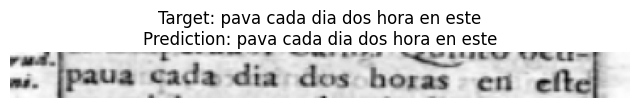

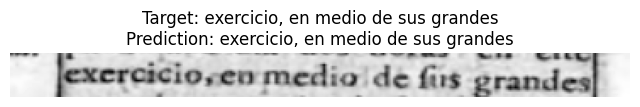

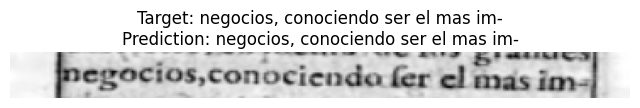

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

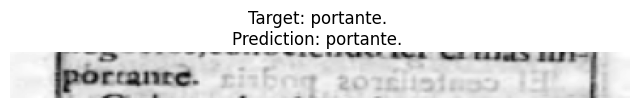

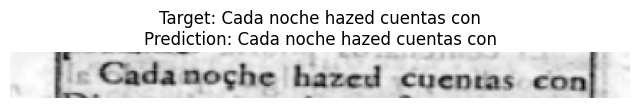

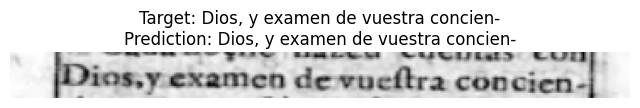

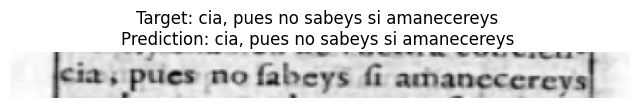

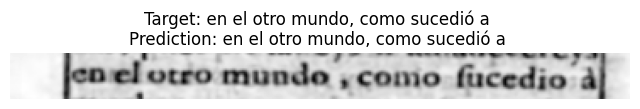

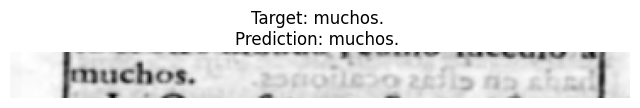

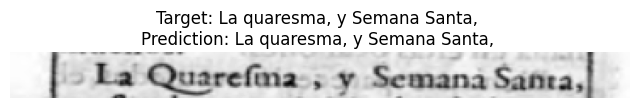

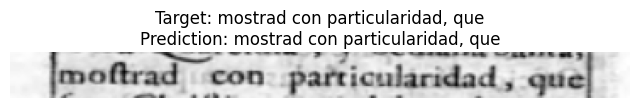

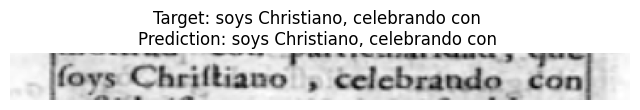

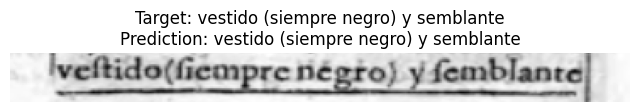

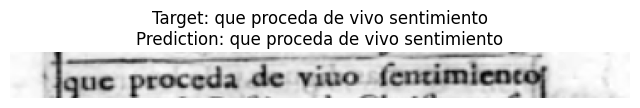

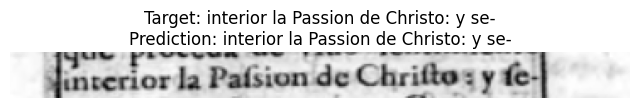

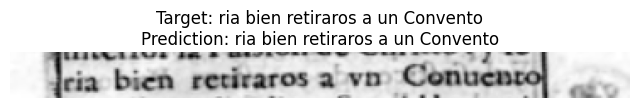

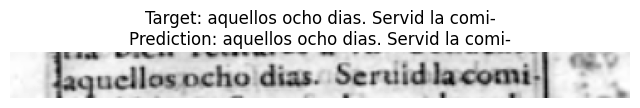

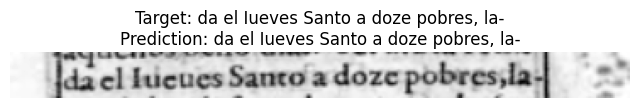

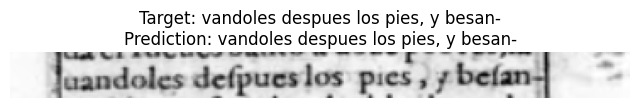

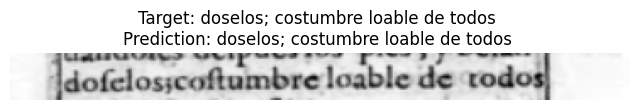

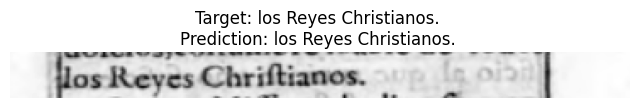

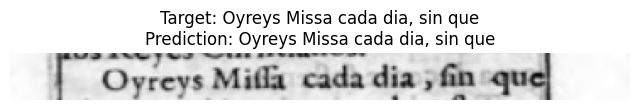

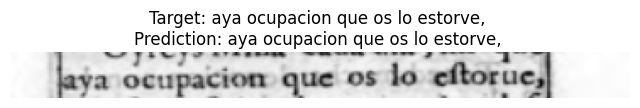

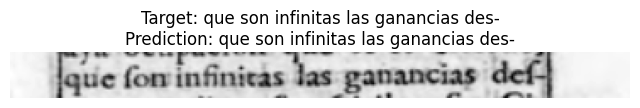

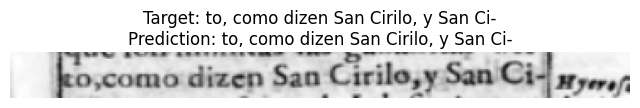

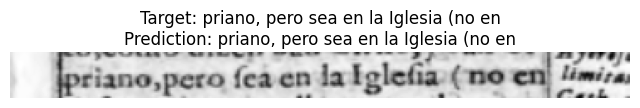

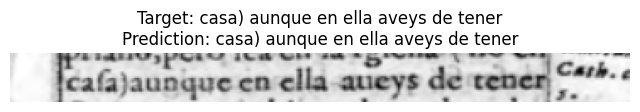

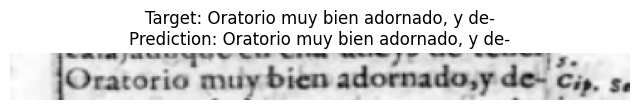

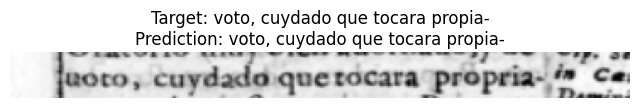

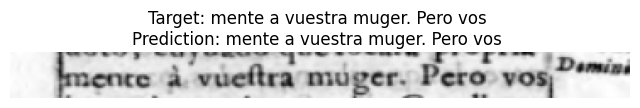

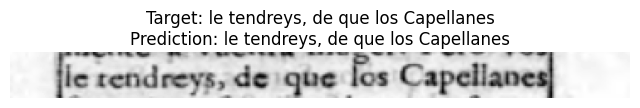

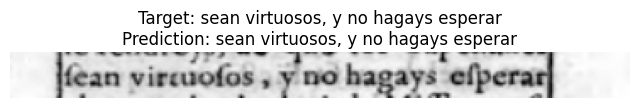

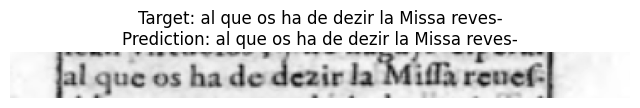

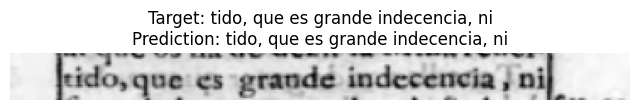

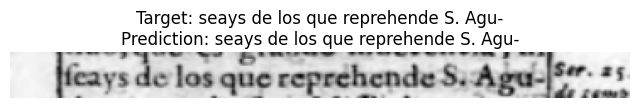

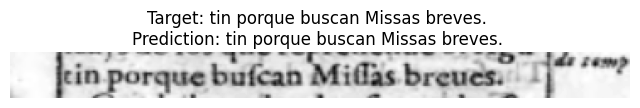

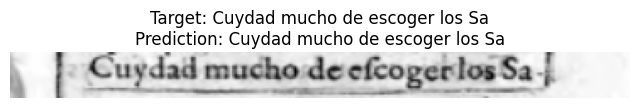

Average CER: 0.0000
Average WER: 0.0000
Average BLEU: 0.9375
Evaluation completed.


In [ ]:
test_line_images = '/content/test_images/P1-16'

aligned_data = {}
aligned_data['/content/image_folder1/Padilla - 1_page_16.png'] = align_segments_with_transcriptions('/content/image_folder1/Padilla - 1_page_16.png', test_line_images, transcript['/content/image_folder1/Padilla - 1_page_16.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

# Training 6

### Using weights from Training 5v3 (trained on augmented data) and training the model for 15 epochs on non augmented data and changed scheduler

In [ ]:
! cp -r /content/drive/MyDrive/finetuned_transformer_model5v3 /content/finetuned_transformer_model5v3

In [ ]:
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datasets import load_metric

# Load the CER and WER metrics
cer_metric = load_metric("cer")
wer_metric = load_metric("wer")

model_path = "./finetuned_transformer_model5v3"
processor_path = "./finetuned_transformer_model5v3"

processor = TrOCRProcessor.from_pretrained(processor_path, do_rescale=False)
model = VisionEncoderDecoderModel.from_pretrained(model_path)

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Extract the logits from the tuple if necessary
    if isinstance(logits, tuple):
        logits = logits[0]

    # Convert logits to the most likely token IDs
    predictions = logits.argmax(-1)

    # Decode predictions to text
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Prepare labels for decoding
    decoded_labels = []
    for label in labels:
        # Filter out -100 values which are used for padding/ignored indices
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)

    # Compute CER and WER using the loaded metrics
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)

    return {"cer": cer_score, "wer": wer_score}



class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(5.0, 10.0), p=1.0),
                    A.ElasticTransform(alpha=0.2, sigma=50.0, alpha_affine=0.2, p=1.0),
                    A.OpticalDistortion(distort_limit=0.02, shift_limit=0.02, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=1.0),

            ])
        else:
            self.transform = A.Compose([
            ])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 dimensions
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        # Convert image to PIL for resizing
        image = Image.fromarray(image)

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array
        image = np.array(image) / 255.0

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Truncate labels if they exceed the maximum length
        encoding['labels'] = encoding['labels'][:, :self.max_length]

        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model5v3"
    processor_path = "./finetuned_transformer_model5v3"

    processor = TrOCRProcessor.from_pretrained(processor_path, do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=False)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create the model
    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=15,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=100,
        save_steps=100,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=100,
        learning_rate=3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=16,
        fp16=True,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
        compute_metrics=compute_metrics  # Ensure metrics are computed
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model6")
    processor.save_pretrained("finetuned_transformer_model6")

In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512,val_split=0.2)

In [ ]:
# test

In [ ]:
! cp -r /content/drive/MyDrive/finetuned_transformer_model6 /content/finetuned_transformer_model6

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from jiwer import wer
import jiwer

def evaluating_model(line_images, texts, target_size=(256, 64), batch_size=2):
    # device = torch.device('cpu')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model6"
    processor_path = "./finetuned_transformer_model6"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, texts, target_size,apply_augmentation=False)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0

    cer_scores = []
    wer_scores = []
    bleu_scores = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)

            # Calculate CER and WER for each prediction
            for i in range(len(generated_texts)):
                gt = texts[num_batches * batch_size + i]
                pred = generated_texts[i]

                # Calculate CER
                cer = jiwer.wer(gt, pred) / len(gt)
                cer_scores.append(cer)

                # Calculate WER
                wer_score = wer(gt, pred)
                wer_scores.append(wer_score)

                # Calculate BLEU score
                bleu_score = sentence_bleu([gt.split()], pred.split())
                bleu_scores.append(bleu_score)

                # Display image and predictions
                image = line_images[num_batches * batch_size + i]
                plt.figure(figsize=(8, 6))
                plt.imshow(image, cmap='gray')
                plt.title(f"Target: {gt}\nPrediction: {pred}")
                plt.axis('off')
                plt.show()
                print("="*50)

            num_batches += 1

    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 0
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

    print(f"Average CER: {avg_cer:.4f}")
    print(f"Average WER: {avg_wer:.4f}")
    print(f"Average BLEU: {avg_bleu:.4f}")
    print("Evaluation completed.")


In [ ]:
test_line_images = '/content/test_images/P1-16'

aligned_data = {}
aligned_data['/content/image_folder1/Padilla - 1_page_16.png'] = align_segments_with_transcriptions('/content/image_folder1/Padilla - 1_page_16.png', test_line_images, transcript['/content/image_folder1/Padilla - 1_page_16.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

#Training 5

### Training images undergoes random augmentation during each epoch, due to these diverse on the fly computations with a p probability. Also implemented Label smoothening stratergy, to prevent overfitting

In [ ]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=512,
    no_repeat_ngram_size=3
)

generation_config.save_pretrained("generation_config_5")

In [ ]:
#v1
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(5.0, 10.0), p=1.0),
                    A.ElasticTransform(alpha=0.1, sigma=50.0, alpha_affine=0.1, p=0.9),
                    A.OpticalDistortion(distort_limit=0.02, shift_limit=0.02, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(2, 2), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-2, 2), p=0.9),
                    A.Perspective(scale=(0.01, 0.025), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(1, 3), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=0.9),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=0.9)
                ], p=0.8),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 dimensions
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        # Convert image to PIL for resizing
        image = Image.fromarray(image)

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array
        image = np.array(image) / 255.0

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")

        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create the model
    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=50,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=20,
        save_steps=20,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=20,
        learning_rate= 3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="loss",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps= 64,
        fp16=True,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model5")
    processor.save_pretrained("finetuned_transformer_model5")


In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512)


In [ ]:
#v2 - Label Smoothening Stratergy
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(5.0, 10.0), p=1.0),
                    A.ElasticTransform(alpha=0.1, sigma=50.0, alpha_affine=0.1, p=0.9),
                    A.OpticalDistortion(distort_limit=0.02, shift_limit=0.02, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(2, 2), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-2, 2), p=0.9),
                    A.Perspective(scale=(0.01, 0.025), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(1, 3), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=0.9),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=0.9)
                ], p=0.8),
            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 dimensions
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        # Convert image to PIL for resizing
        image = Image.fromarray(image)

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array
        image = np.array(image) / 255.0

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")

        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

class LabelSmoothingTrainer(Trainer):
    def __init__(self, *args, tokenizer=None, smoothing=0.1, **kwargs):
        super().__init__(*args, **kwargs)
        self.smoothing = smoothing
        self.tokenizer = tokenizer
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        if labels is not None:
            labels = labels.clone()
            labels[labels == -100] = self.tokenizer.pad_token_id
            smoothing_value = self.smoothing / (self.model.config.vocab_size - 1)
            one_hot = torch.full((labels.size(0), labels.size(1), self.model.config.vocab_size), smoothing_value)
            one_hot = one_hot.to(self.device)
            one_hot.scatter_(2, labels.unsqueeze(-1), 1.0 - self.smoothing)
            logits = model(**inputs).logits
            log_probs = torch.nn.functional.log_softmax(logits, dim=-1)
            loss = -(one_hot * log_probs).sum(dim=-1).mean()
        else:
            loss = super().compute_loss(model, inputs, return_outputs)

        if return_outputs:
            return loss, model(**inputs)
        return loss


def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create the model
    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=50,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=20,
        save_steps=20,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=20,
        learning_rate= 3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="loss",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps= 64,
        fp16=True,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = LabelSmoothingTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
        tokenizer=processor.tokenizer,
        smoothing=0.1
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model5")
    processor.save_pretrained("finetuned_transformer_model5")


In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=1024)


In [ ]:
#v3
import albumentations as A
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datasets import load_metric

# Load the CER and WER metrics
cer_metric = load_metric("cer")
wer_metric = load_metric("wer")
# processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
# model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Extract the logits from the tuple if necessary
    if isinstance(logits, tuple):
        logits = logits[0]

    # Convert logits to the most likely token IDs
    predictions = logits.argmax(-1)

    # Decode predictions to text
    decoded_preds = processor.tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Prepare labels for decoding
    decoded_labels = []
    for label in labels:
        # Filter out -100 values which are used for padding/ignored indices
        label_filtered = [token for token in label if token != -100]
        decoded_label = processor.tokenizer.decode(label_filtered, skip_special_tokens=True)
        decoded_labels.append(decoded_label)

    # Compute CER and WER using the loaded metrics
    cer_score = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    wer_score = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)

    return {"cer": cer_score, "wer": wer_score}



class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512, apply_augmentation=False):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length
        self.apply_augmentation = apply_augmentation

        if apply_augmentation:
            self.transform = A.Compose([
                A.OneOf([
                    A.Rotate(limit=2, p=1.0),
                    A.GaussNoise(var_limit=(5.0, 10.0), p=1.0),
                    A.ElasticTransform(alpha=0.2, sigma=50.0, alpha_affine=0.2, p=1.0),
                    A.OpticalDistortion(distort_limit=0.02, shift_limit=0.02, p=1.0),
                    A.CLAHE(clip_limit=2, tile_grid_size=(4, 4), p=1.0),
                    A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-2, 2), p=1.0),
                    A.Perspective(scale=(0.01, 0.03), p=1.0),
                    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
                    A.GaussianBlur(blur_limit=(3, 5), p=1.0),
                    A.GridDistortion(num_steps=3, distort_limit=0.02, p=1.0),
                    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, p=1.0),
                    A.MedianBlur(blur_limit=3, p=1.0)
                ], p=1.0),

            ])
        else:
            self.transform = A.Compose([])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 dimensions
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        if self.apply_augmentation:
            augmented = self.transform(image=image)
            image = augmented['image']

        # Convert image to PIL for resizing
        image = Image.fromarray(image)

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array
        image = np.array(image) / 255.0

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Truncate labels if they exceed the maximum length
        encoding['labels'] = encoding['labels'][:, :self.max_length]

        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=8, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    generation_config = GenerationConfig.from_pretrained("generation_config_5")

    dataset = LineDataset(processor, model, line_images, texts, target_size, max_length, apply_augmentation=True)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create the model
    model = dataset.model.to(device)

    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=15,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        logging_dir="./logs",
        logging_steps=100,
        save_steps=100,
        save_total_limit=2,
        evaluation_strategy="steps",
        eval_steps=100,
        learning_rate=3e-5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="cer",
        greater_is_better=False,
        logging_first_step=True,
        gradient_accumulation_steps=16,  # Adjust if needed
        fp16=True,
        report_to="all"
    )

    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
        compute_metrics=compute_metrics  # Ensure metrics are computed
    )

    trainer.train()

    model.save_pretrained("finetuned_transformer_model5v3")
    processor.save_pretrained("finetuned_transformer_model5v3")

In [ ]:
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512,val_split=0.2)


### Testing on both Padilla and Porcones

In [ ]:
! cp -r /content/drive/MyDrive/finetuned_transformer_model5v3 /content/finetuned_transformer_model5v3

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from jiwer import wer
import jiwer

def evaluating_model(line_images, texts, target_size=(256, 64), batch_size=2):
    # device = torch.device('cpu')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model5v3"
    processor_path = "./finetuned_transformer_model5v3"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, texts, target_size, apply_augmentation=True)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0

    cer_scores = []
    wer_scores = []
    bleu_scores = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)

            # Calculate CER and WER for each prediction
            for i in range(len(generated_texts)):
                gt = texts[num_batches * batch_size + i]
                pred = generated_texts[i]

                # Calculate CER
                cer = jiwer.wer(gt, pred) / len(gt)
                cer_scores.append(cer)

                # Calculate WER
                wer_score = wer(gt, pred)
                wer_scores.append(wer_score)

                # Calculate BLEU score
                bleu_score = sentence_bleu([gt.split()], pred.split())
                bleu_scores.append(bleu_score)

                # Display image and predictions
                image = line_images[num_batches * batch_size + i]
                plt.figure(figsize=(8, 6))
                plt.imshow(image, cmap='gray')
                plt.title(f"Target: {gt}\nPrediction: {pred}")
                plt.axis('off')
                plt.show()
                print("="*50)

            num_batches += 1

    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 0
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

    print(f"Average CER: {avg_cer:.4f}")
    print(f"Average WER: {avg_wer:.4f}")
    print(f"Average BLEU: {avg_bleu:.4f}")
    print("Evaluation completed.")


In [ ]:
test_line_images = '/content/test_images/P1-16'

aligned_data = {}
aligned_data['/content/image_folder1/Padilla - 1_page_16.png'] = align_segments_with_transcriptions('/content/image_folder1/Padilla - 1_page_16.png', test_line_images, transcript['/content/image_folder1/Padilla - 1_page_16.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

In [ ]:
import torch
from torch.utils.data import DataLoader
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to load images from a directory
def load_images_from_directory(directory_path, target_size):
    images = []
    image_paths = []
    for filename in os.listdir(directory_path):
        if filename.endswith((".png", ".jpg", ".jpeg")):  # Add more extensions if needed
            image_path = os.path.join(directory_path, filename)
            image = Image.open(image_path).convert("RGB")  # Ensure 3 channels
            # image = image.resize(target_size, Image.BILINEAR)
            image = np.array(image, dtype=np.uint8)  # Ensure dtype uint8
            images.append(image)
            image_paths.append(image_path)
    return images, image_paths


def generate_texts_from_images(line_images, target_size=(256, 64), batch_size=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model5v3"
    processor_path = "./finetuned_transformer_model5v3"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, [""]*len(line_images), target_size)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()

    generated_texts = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts_batch = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)


            generated_texts.extend(generated_texts_batch)

    return generated_texts

In [ ]:
# Load images from the specified directory
image_directory = '/content/drive/MyDrive/porcones_test_2'
target_size = (256, 64)
line_images, image_paths = load_images_from_directory(image_directory, target_size)

# Generate texts for the loaded images
generated_texts = generate_texts_from_images(line_images, target_size=target_size, batch_size=2)

# Display the images with their generated texts
for img_path, img, text in zip(image_paths, line_images, generated_texts):
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Generated Text: {text}")
    plt.axis('off')
    plt.show()
    print(f"Image Path: {img_path}\nGenerated Text: {text}\n{'='*50}")

In [ ]:
# Load images from the specified directory
image_directory = '/content/drive/MyDrive/porcones_test_3'
target_size = (256, 64)
line_images, image_paths = load_images_from_directory(image_directory, target_size)

# Generate texts for the loaded images
generated_texts = generate_texts_from_images(line_images, target_size=target_size, batch_size=2)

# Display the images with their generated texts
for img_path, img, text in zip(image_paths, line_images, generated_texts):
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Generated Text: {text}")
    plt.axis('off')
    plt.show()
    print(f"Image Path: {img_path}\nGenerated Text: {text}\n{'='*50}")

#Training- 4

### Implemented Multiple Data Augmentation on a training image, each augmentation with its respected p probability

In [ ]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=512,
    no_repeat_ngram_size=3
)

generation_config.save_pretrained("generation_config_4")

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, get_linear_schedule_with_warmup
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
import cv2

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length

        # Define augmentations
        self.transform = A.Compose([
            A.Rotate(limit=3, p=0.5),  # Randomly rotate upto 3 degrees
            A.ElasticTransform(alpha=0.25, sigma=100.0, alpha_affine=0.45, p=0.5),  # Apply elastic transformations
            A.GaussNoise(var_limit=(10.0, 40.0), p=0.5),  # Apply Gaussian noise
            A.Affine(scale=(0.95, 1.05), translate_percent=(0.01, 0.01), shear=(-3, 3), p=0.5),  # Affine transformations
            A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=0.5),  # Apply optical distortion
            A.CLAHE(clip_limit=2, tile_grid_size=(8, 8), p=0.5),  # Apply CLAHE for contrast enhancement
            A.Perspective(scale=(0.02, 0.05), p=0.5),  # Apply perspective transformations
            A.OneOf([
                A.GaussianBlur(blur_limit=(3, 7)),
                A.MedianBlur(blur_limit=3),
            ], p=1.0),  # Apply blur
            ToTensorV2()  # Convert image to tensor
        ])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 channels
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)
        if image.shape[-1] == 1:
            image = np.repeat(image, 3, axis=-1)


        # Ensure the image is in uint8 format
        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        augmented = self.transform(image=image)
        image = augmented['image']

        # Prepare inputs for the processor
        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Remove batch dimension from encoding
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    # Collate function to create batches
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    # Load the GenerationConfig
    generation_config = GenerationConfig.from_pretrained("generation_config_4")

    dataset = LineDataset(processor, model, line_images, texts, target_size)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create the model
    model = dataset.model.to(device)
    model.generation_config = generation_config

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="./results",                # output directory
        num_train_epochs=25,                    # total number of training epochs
        per_device_train_batch_size=batch_size, # batch size per device during training
        per_device_eval_batch_size=batch_size, # batch size for evaluation
        logging_dir="./logs",                  # directory for storing logs
        logging_steps=50,
        save_steps=100,                         # Save checkpoint every 50 steps
        save_total_limit=2,                    # Limit the total amount of checkpoints
        evaluation_strategy="steps",           # Evaluation strategy to adopt during training
        eval_steps=100,                         # Number of update steps between two evaluations
        learning_rate=5e-5,                    # Learning rate
        weight_decay=0.01,                     # Weight decay for regularization
        load_best_model_at_end=True,           # Load the best model at the end of training
        metric_for_best_model="loss",          # Metric to use to compare models
        greater_is_better=False,               # Whether the metric should be maximized
        logging_first_step=True,               # Log the first step
        gradient_accumulation_steps=4,         # Gradient accumulation steps to simulate a larger batch size
        fp16=True,                             # Use mixed precision training
    )

    # Initialize the optimizer
    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)
    # Calculate total training steps
    total_steps = len(train_dataset) // batch_size * training_args.num_train_epochs

    # Initialize the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=total_steps * 0.1,   # Warmup steps as 10% of total steps
        num_training_steps=total_steps
    )
    # Initialize the Trainer
    trainer = Trainer(
        model=model,                           # Transformers model to be trained
        args=training_args,                    # training arguments, defined above
        train_dataset=train_dataset,           # training dataset
        eval_dataset=val_dataset,              # validation dataset
        data_collator=collate_fn,              # our data collator
        optimizers=(optimizer, scheduler)                 # AdamW optimizer
    )

    # Train the model
    trainer.train()

    # Save the trained model and the processor
    model.save_pretrained("finetuned_transformer_model4")
    dataset.processor.save_pretrained("finetuned_transformer_model4")

In [ ]:
# Flatten the aligned data
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

# Train the model with the resized images
train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512)

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, get_linear_schedule_with_warmup, EarlyStoppingCallback
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
import cv2

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length

        # Define augmentations
        self.transform = A.Compose([
            A.Rotate(limit=2, p=0.5),  # Randomly rotate up to 2 degrees
            A.GaussNoise(var_limit=(5.0, 10.0), p=0.5),  # Apply Gaussian noise
            A.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=0.5),  # Apply optical distortion
            A.CLAHE(clip_limit=2, tile_grid_size=(2, 2), p=0.5),  # Apply CLAHE for contrast enhancement
            A.Perspective(scale=(0.01, 0.025), p=0.5),  # Apply perspective transformations
            A.OneOf([
                A.GaussianBlur(blur_limit=(1, 3)),
                A.MedianBlur(blur_limit=1),
            ], p=1.0),  # Apply blur
            ToTensorV2()  # Convert image to tensor
        ])

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to numpy array and ensure it has 3 channels
        if isinstance(image, Image.Image):
            image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)
        if image.shape[-1] == 1:
            image = np.repeat(image, 3, axis=-1)

        # Ensure the image is in uint8 format
        image = (image * 255).astype(np.uint8)

        # Apply augmentations
        augmented = self.transform(image=image)
        image = augmented['image']

        # Prepare inputs for the processor
        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Remove batch dimension from encoding
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    # Collate function to create batches
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    # Load the GenerationConfig
    generation_config = GenerationConfig.from_pretrained("generation_config_4")

    dataset = LineDataset(processor, model, line_images, texts, target_size)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Calculate total training steps
    total_steps = len(train_dataset) // batch_size * 30

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="./results",                # output directory
        num_train_epochs=30,                    # total number of training epochs
        per_device_train_batch_size=batch_size, # batch size per device during training
        per_device_eval_batch_size=batch_size,  # batch size for evaluation
        logging_dir="./logs",                  # directory for storing logs
        logging_steps=50,
        save_steps=100,                         # Save checkpoint every 100 steps
        save_total_limit=2,                    # Limit the total amount of checkpoints
        evaluation_strategy="steps",           # Evaluation strategy to adopt during training
        eval_steps=100,                         # Number of update steps between two evaluations
        learning_rate= 0.0001,                    # Learning rate
        weight_decay=0.05,                     # Weight decay for regularization
        load_best_model_at_end=True,           # Load the best model at the end of training
        metric_for_best_model="loss",          # Metric to use to compare models
        greater_is_better=False,               # Whether the metric should be maximized
        logging_first_step=True,               # Log the first step
        gradient_accumulation_steps=6,         # Gradient accumulation steps to simulate a larger batch size
        fp16=True,                             # Use mixed precision training
        warmup_steps=int(total_steps * 0.05)   # Adjust warmup steps to 5% of total steps
    )

    # Initialize the optimizer
    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    # Initialize the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(total_steps * 0.05),   # Warmup steps as 5% of total steps
        num_training_steps=total_steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,                           # Transformers model to be trained
        args=training_args,                    # training arguments, defined above
        train_dataset=train_dataset,           # training dataset
        eval_dataset=val_dataset,              # validation dataset
        data_collator=collate_fn,              # our data collator
        optimizers=(optimizer, scheduler),     # AdamW optimizer and scheduler
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Early stopping
    )

    # Train the model
    trainer.train()

    # Save the trained model and the processor
    model.save_pretrained("finetuned_transformer_model4V4")
    dataset.processor.save_pretrained("finetuned_transformer_model4V4")

In [ ]:
# Flatten the aligned data
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

# Train the model with the resized images
train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512)

# Training 3


### Added Optimizers and Schedulers

In [ ]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    max_length=512,
    no_repeat_ngram_size=3
)

generation_config.save_pretrained("finetuned_transformer_model2")


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments, GenerationConfig, get_linear_schedule_with_warmup
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to PIL for resizing
        image = Image.fromarray((image * 255).astype(np.uint8))

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array and ensure it has 3 dimensions
        image = np.array(image) / 255.0
        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        # Prepare inputs for the processor
        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Remove batch dimension from encoding
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    # Collate function to create batches
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    # Load the GenerationConfig
    generation_config = GenerationConfig.from_pretrained("finetuned_transformer_model2")

    dataset = LineDataset(processor, model, line_images, texts, target_size)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create the model
    model = dataset.model.to(device)
    model.generation_config = generation_config

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="./results",                # output directory
        num_train_epochs=20,                    # total number of training epochs
        per_device_train_batch_size=batch_size, # batch size per device during training
        per_device_eval_batch_size=batch_size, # batch size for evaluation
        logging_dir="./logs",                  # directory for storing logs
        logging_steps=50,
        save_steps=100,                         # Save checkpoint every 50 steps
        save_total_limit=2,                    # Limit the total amount of checkpoints
        evaluation_strategy="steps",           # Evaluation strategy to adopt during training
        eval_steps=100,                         # Number of update steps between two evaluations
        learning_rate=5e-5,                    # Learning rate
        weight_decay=0.01,                     # Weight decay for regularization
        load_best_model_at_end=True,           # Load the best model at the end of training
        metric_for_best_model="loss",          # Metric to use to compare models
        greater_is_better=False,               # Whether the metric should be maximized
        logging_first_step=True,               # Log the first step
        gradient_accumulation_steps=4,         # Gradient accumulation steps to simulate a larger batch size
        fp16=True,                             # Use mixed precision training
    )

    # Initialize the optimizer
    optimizer = AdamW(model.parameters(), lr=training_args.learning_rate, weight_decay=training_args.weight_decay)

    # Calculate total training steps
    total_steps = len(train_dataset) // batch_size * training_args.num_train_epochs

    # Initialize the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=total_steps * 0.1,   # Warmup steps as 10% of total steps
        num_training_steps=total_steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,                           # Transformers model to be trained
        args=training_args,                    # training arguments, defined above
        train_dataset=train_dataset,           # training dataset
        eval_dataset=val_dataset,              # validation dataset
        data_collator=collate_fn,              # our data collator
        optimizers=(optimizer, scheduler)      # AdamW optimizer and learning rate scheduler
    )

    # Train the model
    trainer.train()

    # Save the trained model and the processor
    model.save_pretrained("finetuned_transformer_model3")
    dataset.processor.save_pretrained("finetuned_transformer_model3")

# Flatten the aligned data
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

# Train the model with the resized images
train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512)


#Training - 2

### Used Trainer Api for training with some additional training arguments

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Trainer, TrainingArguments
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence

class LineDataset(Dataset):
    def __init__(self, processor, model, line_images, texts, target_size=(256, 64), max_length=512):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.processor.image_processor.max_length = max_length
        self.processor.tokenizer.model_max_length = max_length
        self.model = model
        self.model.config.max_length = max_length
        self.target_size = target_size
        self.max_length = max_length

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to PIL for resizing
        image = Image.fromarray((image * 255).astype(np.uint8))

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array and ensure it has 3 dimensions
        image = np.array(image) / 255.0
        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        # Prepare inputs for the processor
        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Remove batch dimension from encoding
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    # Collate function to create batches
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512, val_split=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    dataset = LineDataset(processor, model, line_images, texts, target_size)

    # Split the dataset into training and validation datasets
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create the model
    model = dataset.model.to(device)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="./results",                # output directory
        num_train_epochs=5,                    # total number of training epochs
        per_device_train_batch_size=batch_size, # batch size per device during training
        per_device_eval_batch_size=batch_size, # batch size for evaluation
        logging_dir="./logs",                  # directory for storing logs
        logging_steps=10,
        save_steps=50,                         # Save checkpoint every 50 steps
        save_total_limit=2,                    # Limit the total amount of checkpoints
        evaluation_strategy="steps",           # Evaluation strategy to adopt during training
        eval_steps=50,                         # Number of update steps between two evaluations
        learning_rate=5e-5,                    # Learning rate
        weight_decay=0.01,                     # Weight decay for regularization
        load_best_model_at_end=True,           # Load the best model at the end of training
        metric_for_best_model="loss",          # Metric to use to compare models
        greater_is_better=False,               # Whether the metric should be maximized
        logging_first_step=True,               # Log the first step
        gradient_accumulation_steps=4,         # Gradient accumulation steps to simulate a larger batch size
        fp16=True,                             # Use mixed precision training
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,                           # Transformers model to be trained
        args=training_args,                    # training arguments, defined above
        train_dataset=train_dataset,           # training dataset
        eval_dataset=val_dataset,              # validation dataset
        data_collator=collate_fn               # our data collator
    )

    # Train the model
    trainer.train()

    # Save the trained model and the processor
    model.save_pretrained("finetuned_transformer_model2")
    dataset.processor.save_pretrained("finetuned_transformer_model2")



In [ ]:
# Flatten the aligned data
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

# Train the model with the resized images
train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2, max_length=512)


In [ ]:
# test

In [ ]:
! cp -r /content/drive/MyDrive/finetuned_transformer_model2 /content/finetuned_transformer_model2

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from jiwer import wer
import jiwer

def evaluating_model(line_images, texts, target_size=(256, 64), batch_size=2):
    # device = torch.device('cpu')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model2"
    processor_path = "./finetuned_transformer_model2"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, texts, target_size)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0

    cer_scores = []
    wer_scores = []
    bleu_scores = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)

            # Calculate CER and WER for each prediction
            for i in range(len(generated_texts)):
                gt = texts[num_batches * batch_size + i]
                pred = generated_texts[i]

                # Calculate CER
                cer = jiwer.wer(gt, pred) / len(gt)
                cer_scores.append(cer)

                # Calculate WER
                wer_score = wer(gt, pred)
                wer_scores.append(wer_score)

                # Calculate BLEU score
                bleu_score = sentence_bleu([gt.split()], pred.split())
                bleu_scores.append(bleu_score)

                # Display image and predictions
                image = line_images[num_batches * batch_size + i]
                plt.figure(figsize=(8, 6))
                plt.imshow(image, cmap='gray')
                plt.title(f"Target: {gt}\nPrediction: {pred}")
                plt.axis('off')
                plt.show()
                print("="*50)

            num_batches += 1

    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 0
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

    print(f"Average CER: {avg_cer:.4f}")
    print(f"Average WER: {avg_wer:.4f}")
    print(f"Average BLEU: {avg_bleu:.4f}")
    print("Evaluation completed.")


In [ ]:
test_line_images = '/content/test_images/P2-16'

aligned_data = {}
aligned_data['/content/image_folder2/Padilla - 2_page_16.png'] = align_segments_with_transcriptions('/content/image_folder2/Padilla - 2_page_16.png', test_line_images, transcript['/content/image_folder2/Padilla - 2_page_16.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

In [ ]:
test_line_images = '/content/test_images/P1-2'

aligned_data = {}
aligned_data['/content/image_folder1/Padilla - 1_page_2.png'] = align_segments_with_transcriptions('/content/image_folder1/Padilla - 1_page_2.png', test_line_images, transcript['/content/image_folder1/Padilla - 1_page_2.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

#Training-1


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence

class LineDataset(Dataset):
    def __init__(self,processor,model,line_images, texts, target_size=(256, 64)):
        self.line_images = line_images
        self.texts = texts
        self.processor = processor
        self.model = model
        self.target_size = target_size

    def __len__(self):
        return len(self.line_images)

    def __getitem__(self, idx):
        image = self.line_images[idx]
        text = self.texts[idx]

        # Convert image to PIL for resizing
        image = Image.fromarray((image * 255).astype(np.uint8))

        # Resize image
        image = image.resize(self.target_size, Image.BILINEAR)

        # Convert image back to numpy array and ensure it has 3 dimensions
        image = np.array(image) / 255.0
        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)  # Add a channel dimension if it's missing
            image = np.repeat(image, 3, axis=-1)   # Repeat the single channel to create 3 channels

        # Ensure the image has shape (3, height, width)
        image = np.transpose(image, (2, 0, 1))

        # Prepare inputs for the processor
        encoding = self.processor(images=image, text=text, return_tensors="pt")

        # Remove batch dimension from encoding
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        return encoding

def collate_fn(batch):
    # Collate function to create batches
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
    return {'pixel_values': pixel_values, 'labels': labels}

def train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    processor = TrOCRProcessor.from_pretrained("qantev/trocr-large-spanish", do_rescale=False)
    model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-large-spanish")

    dataset = LineDataset(processor, model, line_images, texts, target_size)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    model = dataset.model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
    model.train()
    for epoch in range(3):  # Adjust epochs as needed
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)
            labels = batch["labels"].to(device)

            # Clear CUDA cache to free up memory
            torch.cuda.empty_cache()
            optimizer.zero_grad()

            outputs = model(pixel_values=pixel_values, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            print(f"Loss: {loss.item()}")
    model.save_pretrained("finetuned_transformer_model")
    dataset.processor.save_pretrained("finetuned_transformer_model")




In [ ]:
# Flatten the aligned data
line_images = []
texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        line_images.append(line_img)
        texts.append(text)

# Train the model with the resized images
train_transformer_model(line_images, texts, target_size=(256, 64), batch_size=2)


In [ ]:
# test

In [ ]:
def evaluate_model(line_images, texts, target_size=(256, 64), batch_size=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = "./finetuned_transformer_model"
    processor_path = "./finetuned_transformer_model"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, texts, target_size)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)

            # Display images and predictions
            for i in range(len(generated_texts)):
                gt = texts[num_batches * batch_size + i]
                pred = generated_texts[i]
                image = line_images[num_batches * batch_size + i]

                plt.figure(figsize=(8, 6))
                plt.imshow(image, cmap='gray')
                plt.title(f"Target: {gt}\nPrediction: {pred}")
                plt.axis('off')
                plt.show()
                print("="*50)

            num_batches += 1

    print("Evaluation completed.")


In [ ]:
test_line_images = '/content/test_line_images'

aligned_data = {}

aligned_data['/content/image_folder2/Padilla - 2_page_1.png'] = align_segments_with_transcriptions('/content/image_folder2/Padilla - 2_page_1.png', test_line_images, transcript['/content/image_folder2/Padilla - 2_page_1.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluate_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

In [ ]:
test_line_images = '/content/test_line_images2'

aligned_data = {}

aligned_data['/content/image_folder1/Padilla - 1_page_7.png'] = align_segments_with_transcriptions('/content/image_folder1/Padilla - 1_page_7.png', test_line_images, transcript['/content/image_folder1/Padilla - 1_page_7.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluate_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

In [ ]:
! cp -r /content/drive/MyDrive/finetuned_transformer_model /content/finetuned_transformer_model

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from jiwer import wer
import jiwer

def evaluating_model(line_images, texts, target_size=(256, 64), batch_size=2):
    # device = torch.device('cpu')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_path = "./finetuned_transformer_model"
    processor_path = "./finetuned_transformer_model"

    processor = TrOCRProcessor.from_pretrained(processor_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path)

    dataset = LineDataset(processor, model, line_images, texts, target_size)

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    model = dataset.model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0

    cer_scores = []
    wer_scores = []
    bleu_scores = []

    with torch.no_grad():
        for batch in dataloader:
            pixel_values = batch["pixel_values"].to(device)

            # Generate predictions
            generated_ids = model.generate(pixel_values)
            generated_texts = dataset.processor.batch_decode(generated_ids, skip_special_tokens=True)

            # Calculate CER and WER for each prediction
            for i in range(len(generated_texts)):
                gt = texts[num_batches * batch_size + i]
                pred = generated_texts[i]

                # Calculate CER
                cer = jiwer.wer(gt, pred) / len(gt)
                cer_scores.append(cer)

                # Calculate WER
                wer_score = wer(gt, pred)
                wer_scores.append(wer_score)

                # Calculate BLEU score
                bleu_score = sentence_bleu([gt.split()], pred.split())
                bleu_scores.append(bleu_score)

                # Display image and predictions
                image = line_images[num_batches * batch_size + i]
                plt.figure(figsize=(8, 6))
                plt.imshow(image, cmap='gray')
                plt.title(f"Target: {gt}\nPrediction: {pred}")
                plt.axis('off')
                plt.show()
                print("="*50)

            num_batches += 1

    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 0
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

    print(f"Average CER: {avg_cer:.4f}")
    print(f"Average WER: {avg_wer:.4f}")
    print(f"Average BLEU: {avg_bleu:.4f}")
    print("Evaluation completed.")


In [ ]:
test_line_images = '/content/test_images/P1-7'

aligned_data = {}

aligned_data['/content/image_folder1/Padilla - 1_page_7.png'] = align_segments_with_transcriptions('/content/image_folder1/Padilla - 1_page_7.png', test_line_images, transcript['/content/image_folder1/Padilla - 1_page_7.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)

In [ ]:
test_line_images = '/content/test_images/P2-1'

aligned_data = {}

aligned_data['/content/image_folder2/Padilla - 2_page_1.png'] = align_segments_with_transcriptions('/content/image_folder2/Padilla - 2_page_1.png', test_line_images, transcript['/content/image_folder2/Padilla - 2_page_1.png'])

test_line_img = []
test_texts = []
for page_data in aligned_data.values():
    for line_img, text in page_data:
        test_line_img.append(line_img)
        test_texts.append(text)

evaluating_model(test_line_img, test_texts, target_size=(256, 64), batch_size=2)